In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

titanic_df = pd.read_csv('titanic.csv')

# Exploring What Really Happened on Titanic
I investigated the titanic data provided by Kraggle to explore which factors affected the survival rate of those on board. The following three questions inspired my data investigation:

## Question 1: 
Which socio-economic status (pclass) had the highest survival rate? Is there a correlation between those who survived and their social class?

## Question 2:
Which sex had the highest survival rate?

## Question 3:
Did a person's family size affect survival rate?

## Question 4:
How does age affect the likelihood of survival?  Are young or old people more likely to survive?


## 1) Which socio-economic status (pclass) had the highest survival rate? Is there a correlation between those who survived and their social class?
In order to determine the relationship between a passernger's social class (Pclass) and their chances of survival, I needed to take a closer look at both the Pclass variable, Survived variable, and the two variables together in this dataset.  

In [ ]:
print titanic_df.groupby(['Pclass'])['Survived'].count()

Although the above calculation isn't necessary for my analysis, it still presents a general idea of the socio-economic status on board the Titanic ship.  Below I created a dataframe for the Pclass to hold the grouping of the two variables in question.  Creating the dataframe will allow access to useful functions within that module.

In [ ]:
# average survived for each class
pclass_df = titanic_df.groupby(['Pclass']).mean()['Survived']
pclass_df
# shows that on average the upper class had a higher survival rate than the others classes.

The mean values for each class is a better indicator when looking into the survival rate of passengers on board.  We can clearly see that those in the upper class (Pclass = 1) had the best chance of surviving at 63%.  

A chi-squared goodness of fit test for p1, p2, p3, was performed to compare it to the entire population.  The observed values in this case are p1, p2, and p3.  Assuming an alpha level of 0.05, the following was calculated:

In [ ]:
chi_squared_stat = ((pclass_df[1]-titanic_df.mean()['Survived']**2)/titanic_df.mean()['Survived']).sum()
print(chi_squared_stat)

In [ ]:
chi_critical = stats.chi2.ppf(q = 0.95, 
                              df = 2)   # Df = number of variable categories - 1 (pclass variables - 1)
print"Critical value is:",chi_critical

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=2)
print "P_value is:",p_value

Null Hypothesis: The expected and observed distributions for the survival rates in the Pclass are the same

Since the chi squared test statistic (1.256) is greater than the chi square critical value of 5.99, we accept the null hypothesis.  Therefore, it can be concluded that the social class of a passenger on board is a good predictor of whether or not a person would survive on the boat.

## 2) Which sex had the highest survival rate?
Captivating audiences worldwide, the blockbuster movie, Titanic, demonstrated true love at it's finest.  It also demonstrated which sex remained alive at the end of the movie.  Females.  Hollywood can get carried away sometimes, so this next questions is investigating the legitimacy of the movie plot - the idea that being a female or male affected chances of survival.

Step one, to create a dataframe of the Sex and Survived variables:

In [ ]:
# see how sex affects survival rate
sex_df = titanic_df.groupby(['Sex']).mean()['Survived']
sex_df

The mean survival rate for females is just under 75%!  As compared to the males at 19%.  
Let's test this theory out for passenger x: 24 year old female.

In [ ]:
titanic_df.groupby(['Sex', 'Age']).mean()

By adding these two variables to the index of the dataframe and computing the mean of the data, a simple looking up of passengers with Sex = Female and Age = 24, shows that they had a 87.5% mean survival rate.  Therefore, there's very high chances that someone fitting in this demographic would live to tell the tale of the titanic.

Another way to multi-variable comparison involves the Pclass.  By grouping the dataframe into Sex and Pclass, here's a breakdown of the survival rates for both male and female in each social class:

In [20]:
sex_class_df = titanic_df.groupby(['Sex','Pclass'])[['Survived']].mean()
sex_class_df

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

Clearly, chivalry existed back then as women seemed to take a priority in securing their safety as females in the upper and middle class each had over a 9 and 10 chance of surviving.  Whereas, a male in those same classes had as low as a 15% chance of staying alive and as high as a 36% chance of surviving, respectively.  

Here's a bar chart of the data:
![alt text](barchart.png "Title")

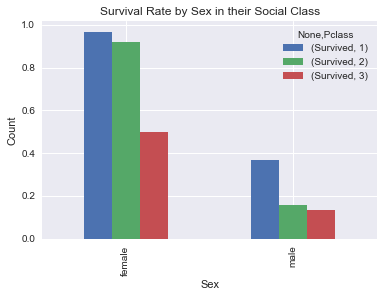

In [23]:
sex_class_df.unstack().plot(kind='bar').set_title('Survival Rate by Sex in their Social Class')
plt.ylabel('Count')

## 3) Did a person's family size affect survival rate?
Next question at large here is whether or not someone belonging to a family, with family on board, affected their chances of surviving.  One would think the more family members around, the more stress there would be to round them up to safety.  The size of a family was determined by condensing the SibSp and Parch variables into one.  

In [ ]:
# create Family variable for the sibsp and parch variables
titanic_df["Family"] = titanic_df["SibSp"] + titanic_df["Parch"]

In [ ]:
# did family size affect survival rate?
titanic_df.groupby(['Family']).mean()['Survived']

This shows that the family size of the total population on the boat ranged from 0 to 10 family members.  Of those, 7+ persons in a family resulted in a 0% survival rate.  It can be argued that the greater the family size, the more chaotic rounding them up would have been when the titanic crashed.  Those with family sizes of 3 had a very high survivial rate of +70%.

## 4) How does age affect the likelihood of survival?  Are young or old people more likely to survive?
The last question I posed is whether or not a passenger's age affected their chances of survival.  I began the analysis by grouping the titanic dataframe by the Survived and Age variables.

In [6]:
# look at the survival rate and age
titanic_df.groupby(['Survived', 'Age']).sum()

PassengerId  Pclass  SibSp  Parch       Fare
Survived Age                                               
0        1.0           552       6      9      3    86.5875
         2.0          2117      19     19     10   311.0750
         3.0           375       3      3      1    21.0750
         4.0          1087       9     11      5    88.3000
         6.0           814       3      4      2    31.2750
         7.0           330       6      8      2    68.8125
         8.0           813       6      7      2    50.2000
         9.0          2842      18     19     11   187.0833
         10.0         1240       6      3      4    52.0500
         11.0         1335       9      9      4    96.9625
         14.0         1386       9      9      3    94.4417
         14.5          112       3      1      0    14.4542
         15.0          353       3      1      1     7.2292
         16.0         4903      31     13      7   230.2542
         17.0         3314      21      2      1    61.8542
         18.0         8228      45      7      3   349.3625
         19.0         6694      41      5      3   463.0915
         20.0         5345      36      1      0    98.4667
         20.5          228       3      0      0     7.2500
         21.0         7438      52      6      3   391.2958
         22.0         5266      46      1      0   257.6499
         23.0         5949      24      2      1   108.9458
         23.5          297       3      0      0     7.2292
         24.0         6201      37      5      1   533.6082
         24.5          677       3      0      0     8.0500
         25.0         9559      44      6      4   351.2667
         26.0         5370      34      7      3   143.6500
         27.0         3024      15      2      2   306.8500
         28.0         6775      46      5      2   374.8040
         28.5          794       6      0      0    23.3292
...                    ...     ...    ...    ...        ...
1        32.0         4081      21      1      0   282.6125
         32.5          124       2      0      0    13.0000
         33.0         3049      10      6      4   299.2000
         34.0         2080      11      1      2   118.5500
         35.0         4172      14      5      1  1532.9542
         36.0         5583      16      4      7  1081.0375
         37.0          249       1      1      1    52.5542
         38.0         1032       7      3      5   500.1958
         39.0         2956       7      4      3   337.5166
         40.0         2320       9      2      2   386.7125
         41.0          611       3      0      1   154.0000
         42.0         3299       9      2      0   358.3667
         43.0          780       1      0      1   211.3375
         44.0         1134       5      0      1    93.6250
         45.0         2532       9      2      2   239.2167
         47.0          872       1      1      1    52.5542
         48.0         3995       7      4      2   285.8084
         49.0         1904       4      3      0   248.6918
         50.0         2207       8      2      2   428.1708
         51.0         1624       2      1      0   104.5083
         52.0         1863       3      2      1   202.2667
         53.0          572       1      2      0    51.4792
         54.0         1786       4      3      3   160.6667
         55.0           16       2      0      0    16.0000
         56.0         1528       2      0      1   118.6583
         58.0          477       3      0      1   326.5333
         60.0          955       2      2      1   154.4500
         62.0         1401       3      0      0    90.5000
         63.0          760       4      1      0    87.5458
         80.0          631       1      0      0    30.0000

[142 rows x 5 columns]

A histogram of the data will give a general idea too of the number of passengers who survived within each age group.
![alt text](histogram1.png "Title")

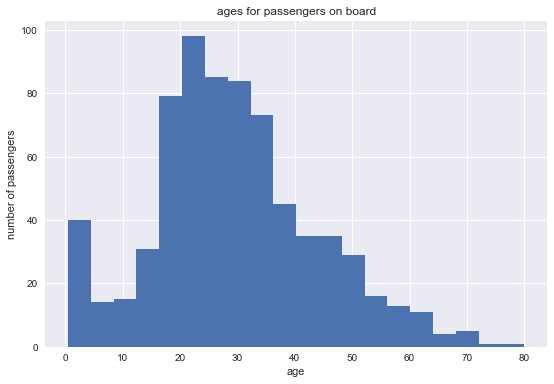

In [7]:
titanic_df.hist(column='Age', # column to plot
               figsize=(9,6), # plot size
               bins=20)       # number of bins
plt.title('ages for passengers on board')
plt.ylabel('number of passengers')
plt.xlabel('age')

Another way to visualize the data for the variables of Age and Survived would be to make use of the kernel density estimate.
![alt text](kernel.png "Title")

C:\Users\ek028m\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


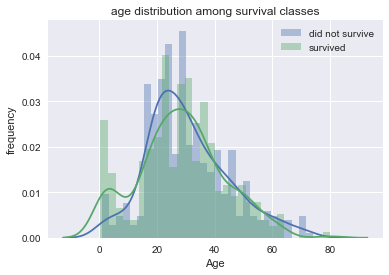

In [8]:
sns.distplot(titanic_df.loc[(titanic_df['Survived']==0) & (~titanic_df['Age'].isnull()),'Age'], bins=30)
sns.distplot(titanic_df.loc[(titanic_df['Survived']==1) & (~titanic_df['Age'].isnull()),'Age'], bins=30)
plt.title('age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['did not survive', 'survived']);

## Conclusion
After analyzing the titanic dataset, it's clear that certain factors played in key role when determining someone's chances of survival after the ship crashed.  This report only covers a few of the factors - Pclass (socio-economic status), Sex, SibSp and Parch (family), and Age - observing how these factors persuaded the Survived variable.  After investigating, it can be concluded that the higher the social class, the higher the chances of suriviving the titanic crash.  It can also be seen that females have about 4x greater chance of surviving.  Passengers with large family sizes did not have quite as large chances of surviving.  And one of the highest surviving age groups were babies.

During the analysis I did uncover interesting information in this data set.  Such as missing observations, missing features, and missing values in the data.

## Missing Observations
This dataset has captured information for a total of 891 passengers.  342 survived the crash, the rest were not so lucky.

In [ ]:
titanic_df.groupby(['Survived']).count()['PassengerId']

However, a quick research shows that the real numbers for the titanic cruise ship were much larger than what's captured in this dataset.  A total of 2228 people were on board the Titanic ship.  337 in first class, 285 second class, and 721 in third class, also mentioned, 885 crew members.  A total of 1503 people died (including passenger and crew).  

## Missing Features
Information that could have helped strengthen the analysis could have been data captured for the crew members on the board.  Whether or not a certain number of crew members were allocated to the different classes on the ship.  Also, information regarding the ship itself would be useful.  Such as the number of lifeboats they had, how many people could fit in each lifeboat, where the lifeboats were located in proximity to the cabins, and who / if anyone had priority to riding in the lifeboats.  Also, did everyone wear life jackets, were there enough to go around for every person on board?

## Missing Values
Taking a closer look at the Age column, there's a number of missing values in the dataset.

In [9]:
# find missing values
titanic_df["Age"].describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
# find the row indexes for missing ages
missing = np.where(titanic_df["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [11]:
len(missing[0])

177

The age variable through a bit of a curveball in the investigation because the data had a lot of missing ages for the people on board, 177, to be exact.  In order to continue with the investigation of this data, a simple replacing of the null values with the median age (28 years old) filled in the gaps.

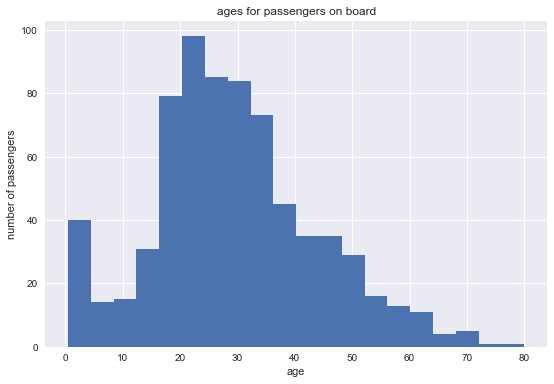

In [12]:
# replace the null values with median age
# plot to find median age
titanic_df.hist(column='Age', # column to plot
               figsize=(9,6), # plot size
               bins=20)       # number of bins
plt.title('ages for passengers on board')
plt.ylabel('number of passengers')
plt.xlabel('age')

In [13]:
# median age of 28
new_age_var = np.where(titanic_df["Age"].isnull(), # logical check
                      28,                          # value if check is true
                      titanic_df["Age"])           # value if check is false

titanic_df["Age"] = new_age_var

titanic_df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Here's what the new histogram looks like with all the null age values replaced with the median age value:
![alt text](histogram2.png "Title")

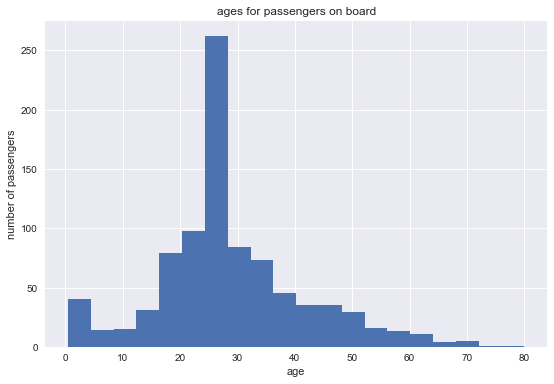

In [14]:
titanic_df.hist(column='Age', # column to plot
               figsize=(9,6), # plot size
               bins=20)       # number of bins
plt.title('ages for passengers on board')
plt.ylabel('number of passengers')
plt.xlabel('age')

In [ ]:
# see how age affects survival rate
age_df = titanic_df.groupby(['Age']).mean()['Survived']
age_df

## Note to Udacity Grader
Thank you very much for your feedback and time.  I enjoyed looking at this dataset and getting an intro into how powerful a tool python can be :)